In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.INFO)
import shnitsel as st
from shnitsel.core.datasheet import Datasheet

INFO:rdkit:Enabling RDKit 2025.09.1 jupyter extensions


## Basic datasheet test

INFO:root:Could not read `test_data/sharc/traj_I01_v3.0` directly as a trajectory.
INFO:root:Attempt to read `test_data/sharc/traj_I01_v3.0` as a directory containing multiple trajectories.


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:root:Expecting socs in SHARC
INFO:root:Expecting socs in SHARC
INFO:root:For sharc before version 4.0, we will attempt to extract charge data from QM interface settings.
INFO:root:For sharc before version 4.0, we will attempt to extract charge data from QM interface settings.
INFO:root:State names already assigned
INFO:root:State names already assigned
INFO:root:Found discrepancies in the following dimensions: []
INFO:root:Found discrepancies in the following dimensions: []
INFO:root:Dimension statecomb is being generated.
INFO:root:cached inter_state in 0.012667402013903484 s
INFO:root:cached spectra in 0.3164149280055426 s
INFO:root:cached spectra_groups in 0.31689888999972027 s
INFO:root:finished plot_separated_spectra_and_hists in 0.6278287860041019 s
INFO:root:Dimension atomcomb is being generated.
INFO:root:cached noodle in 0.005399436995503493 s
INFO:root:finished plot_noodle in 0.02179786399938166 s
[19:46:21] WARNING: Proton(s) added/removed

INFO:root:finished plot_struc

C=[NH2+] InChI=1S/CH3N/
c1-2/h2H,1H2/p+1
<xarray.Dataset> Size: 5kB
Dimensions:              (state: 3, frame: 5, atom: 6, direction: 3,
                          statecomb: 3, full_statecomb: 6, trajid: 2)
Coordinates: (12/22)
  * state                (state) int64 24B 1 2 3
  * frame                (frame) object 40B MultiIndex
  * atom                 (atom) int64 48B 0 1 2 3 4 5
  * direction            (direction) <U1 12B 'x' 'y' 'z'
  * statecomb            (statecomb) object 24B MultiIndex
  * full_statecomb       (full_statecomb) object 48B MultiIndex
    ...                   ...
  * trajid_              (frame) int32 20B 2 2 2 6 6
  * time                 (frame) float64 40B 26.0 33.5 45.5 74.5 99.5
    t_max                (trajid) float64 16B 100.0 100.0
    delta_t              (trajid) float64 16B 0.5 0.5
    max_ts               (trajid) int32 8B 201 201
    completed            (trajid) bool 2B True True
Data variables: (12/14)
    energy               (state, frame) fl

INFO:root:finished plot_nacs_histograms in 0.48538387300504837 s
INFO:root:cached pops in 0.08146325299458113 s
INFO:root:cached delta_E in 0.7098280530044576 s
INFO:root:cached fosc_time in 0.8527446950029116 s
INFO:root:finished plot_timeplots in 1.7017580139945494 s


<xarray.Dataset> Size: 16kB
Dimensions:    (time: 201, statecomb: 3)
Coordinates:
  * time       (time) float64 2kB 0.0 0.5 1.0 1.5 2.0 ... 98.5 99.0 99.5 100.0
  * statecomb  (statecomb) object 24B MultiIndex
  * from       (statecomb) int64 24B 1 1 2
  * to         (statecomb) int64 24B 2 3 3
Data variables:
    lower      (time, statecomb) float64 5kB 0.006801 0.01283 ... -0.005091
    upper      (time, statecomb) float64 5kB 0.0153 0.01293 ... 0.009434 0.01102
    mean       (time, statecomb) float64 5kB 0.01105 0.01288 ... 0.002966
    _color     (statecomb) <U7 84B '#2c3e50' '#C4A000' '#7E5273'
Attributes:
    long_name:       Derived inter-state differences of variable `energy`
    unitdim:         energy
    units:           Hartree
    original_units:  eV
    deltaed:         {'state'}
    tex:             $\Delta E$
<xarray.Dataset> Size: 6kB
Dimensions:    (time: 201, statecomb: 1)
Coordinates:
  * time       (time) float64 2kB 0.0 0.5 1.0 1.5 2.0 ... 98.5 99.0 99.5 100.0
  

{'/unknown/aggregate of subtree(unknown)': <Figure size 827x974.167 with 15 Axes>}

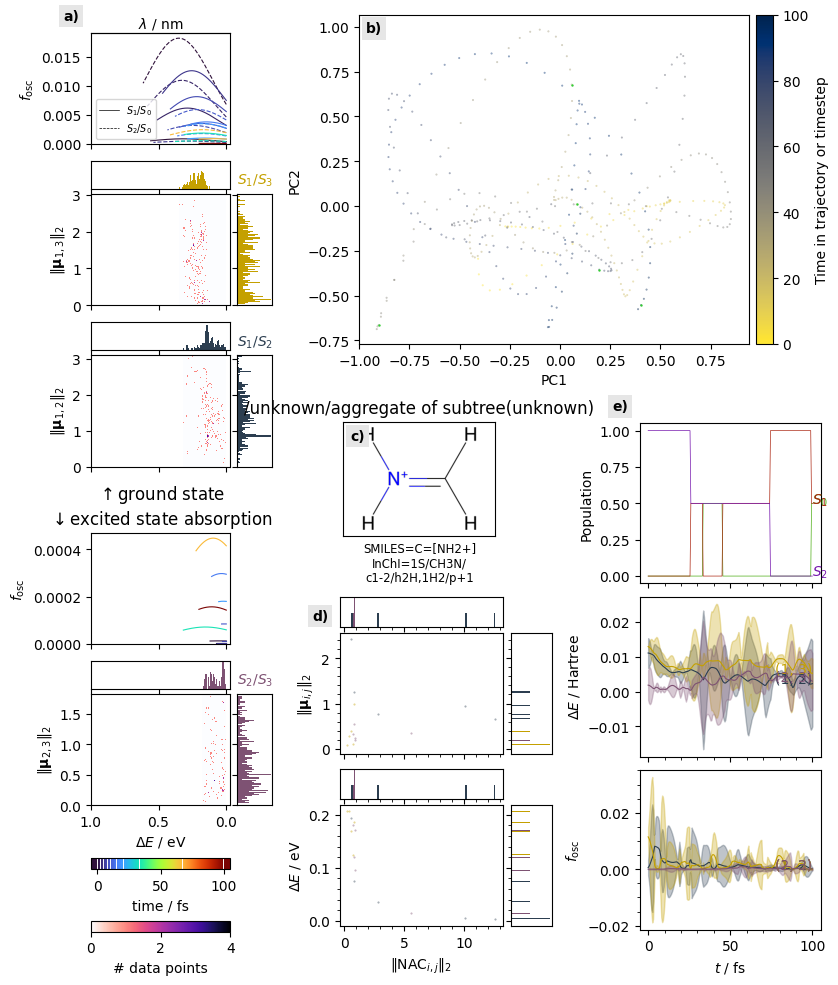

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v3.0/')  # type: ignore
shnitsel_db.set_compound_info(compound_info=CompoundInfo("I01"), apply_to_all=True)


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 1,
            traj.state_charges.attrs,
        )
    )


shnitsel_db = shnitsel_db.map_over_trajectories(set_charges)  # type: ignore

sheet = Datasheet(shnitsel_db)
# sheet.datasheet_pages['root'].charge = 1
sheet.plot()
# sheet.datasheet_pages

In [ ]:
%time sheet.calc_all()

In [ ]:
%time sheet.plot_per_state_histograms()

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)
    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')